In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/TFM - MULTIMODAL

/content/drive/MyDrive/TFM - MULTIMODAL


In [3]:
ls -l

total 10573
-rw------- 1 root root  334799 Dec 14 19:10 analisis-rutas.ipynb
-rw------- 1 root root 5511618 Dec  4 00:46 docs_sections_chunks_ve2.csv
-rw------- 1 root root 4574337 Nov 30 16:13 docs_sections.csv
-rw------- 1 root root  228580 Dec  9 22:20 rutas_nm.csv
-rw------- 1 root root  175869 Dec  2 22:05 rutas_v2.csv


In [4]:
import pandas as pd

def read_csv (path:str) -> pd.DataFrame:
    return pd.read_csv(path)


rutas_df = read_csv('./rutas_v2.csv')
rutas_df.head()

,route_id,pais,region,provincia,comarca,zona,pueblo,nombre_ruta,categoria,dificultad,...,poblacion_cercana,link_archivo,pdf_path,fecha,distancia_total_km,altitud_minima_m,altitud_maxima_m,desnivel_acumulado_pos,desnivel_acumulado_neg,tiempo_total_min
0,0,España,Cataluña,Barcelona,Anoia,Montserrat,El Bruc,Vuelta a las Agujas de Montserrat desde Can Ma...,Rutas circulares;Paisajes pintorescos;Familias...,Media,...,El Bruc,https://www.rutaspirineos.org/rutas/agulles-fr...,D:\TFM\TFM-Arquitectura-RAG\TFM-Arquitectura-R...,11/11/2025,7.0,714.0,980.0,500.0,NaN,185.0
1,1,España,Cataluña,Lérida,Alto Urgel,La Montaña de Alinyà,Fígols y Alinyà,Aiguaneix de Alinyà,"Paisajes pintorescos;Familias y niños;Lagos, r...",Baja,...,Alinyà,https://www.rutaspirineos.org/rutas/aiguaneix-...,D:\TFM\TFM-Arquitectura-RAG\TFM-Arquitectura-R...,11/11/2025,3.2,944.0,1112.0,210.0,NaN,75.0
2,2,España,Cataluña,Lérida,Alta Ribagorza,Valle de Boí,Boí,Estany Llong y Portarró de Espot desde Aigüest...,"Paisajes pintorescos;Familias y niños;Lagos, r...",Notable,...,Boí,https://www.rutaspirineos.org/rutas/aiguestort...,D:\TFM\TFM-Arquitectura-RAG\TFM-Arquitectura-R...,11/11/2025,17.5,1824.0,2427.0,625.0,NaN,330.0
3,3,España,Cataluña,Gerona,Gironés,Las Gavarres (Gironés),Madremanya,Al pie de las Gavarres desde Madremanya,Familias y niños;Rutas circulares,Baja,...,Madremanya,https://www.rutaspirineos.org/rutas/al-peu-de-...,D:\TFM\TFM-Arquitectura-RAG\TFM-Arquitectura-R...,11/11/2025,7.6,111.0,180.0,143.0,NaN,120.0
4,4,España,Cataluña,Gerona,Alto Ampurdán,La llanura ampurdanesa,Castellón de Ampurias,La Reserva Integral de Les Llaunes,"Flora y fauna;Rutas circulares;Lagos, ríos y c...",Baja,...,Castellón de Ampurias,https://www.rutaspirineos.org/rutas/al-voltant...,D:\TFM\TFM-Arquitectura-RAG\TFM-Arquitectura-R...,11/11/2025,8.2,1.0,2.0,2.0,NaN,125.0


In [5]:
rutas_df.isnull().sum()

,0
route_id,0
pais,0
region,0
provincia,10
comarca,35
zona,35
pueblo,79
nombre_ruta,0
categoria,0
dificultad,6


/tmp/ipython-input-3148315722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dificultad_counts.index, y=dificultad_counts.values, palette='viridis')


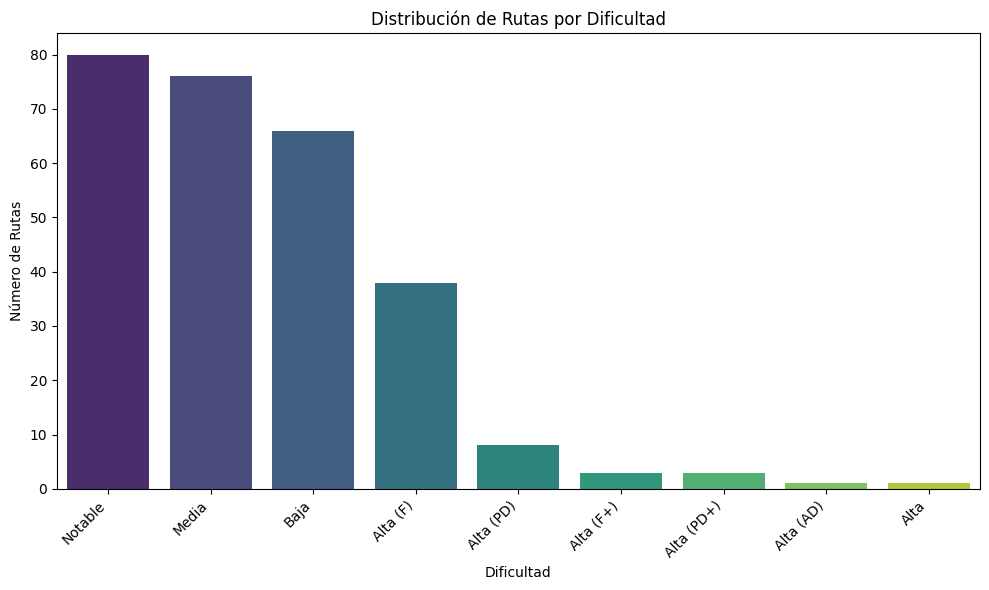

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each difficulty level, including NaN values
dificultad_counts = rutas_df['dificultad'].value_counts(dropna=False)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=dificultad_counts.index, y=dificultad_counts.values, palette='viridis')
plt.title('Distribución de Rutas por Dificultad')
plt.xlabel('Dificultad')
plt.ylabel('Número de Rutas')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

/tmp/ipython-input-1389981780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rutas_df, x='pais', palette='viridis', order=rutas_df['pais'].value_counts().index)


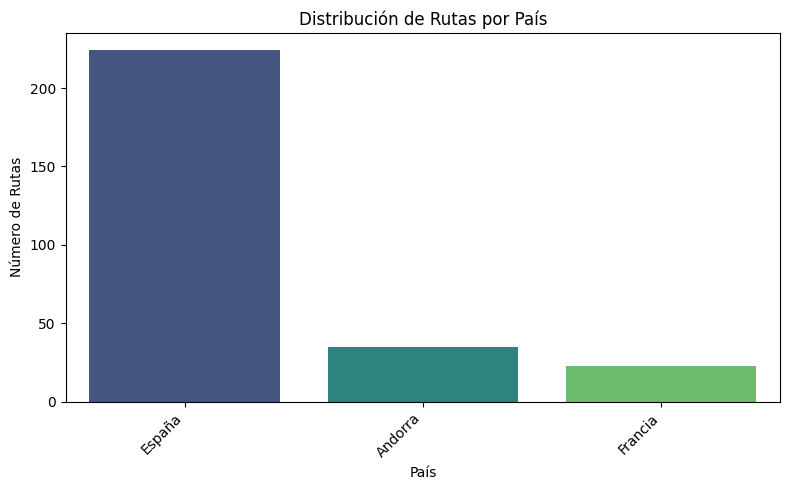

In [53]:
# Plot for 'pais'
plt.figure(figsize=(8, 5))
sns.countplot(data=rutas_df, x='pais', palette='viridis', order=rutas_df['pais'].value_counts().index)
plt.title('Distribución de Rutas por País')
plt.xlabel('País')
plt.ylabel('Número de Rutas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-590806438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rutas_df, x='region', palette='viridis', order=rutas_df['region'].value_counts().index)


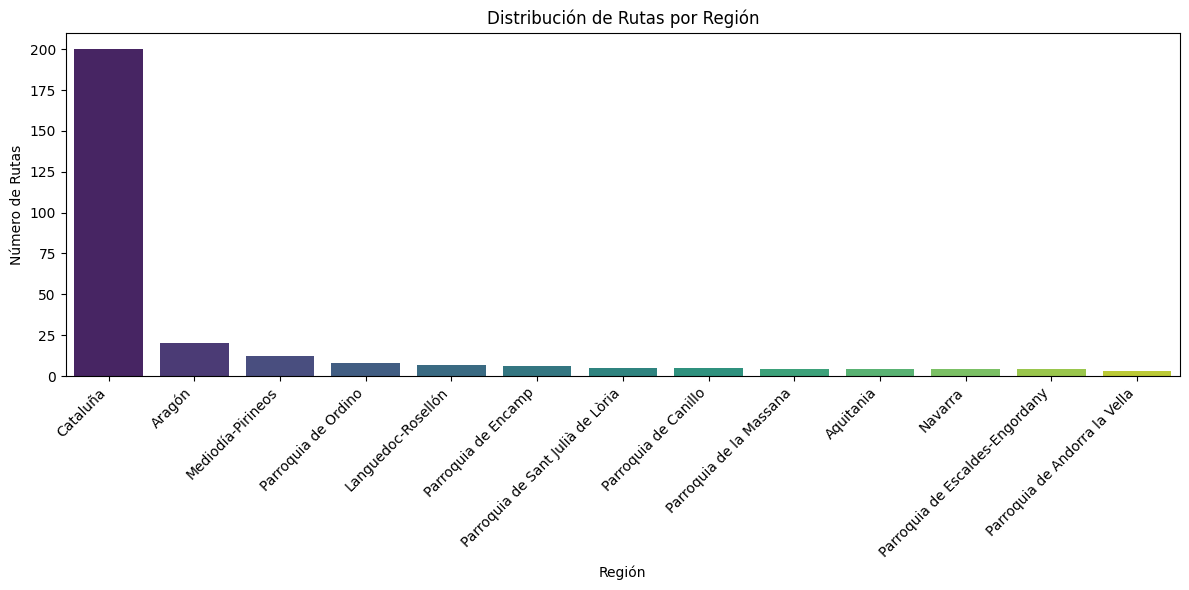

In [7]:
# Plot for 'region'
plt.figure(figsize=(12, 6))
sns.countplot(data=rutas_df, x='region', palette='viridis', order=rutas_df['region'].value_counts().index)
plt.title('Distribución de Rutas por Región')
plt.xlabel('Región')
plt.ylabel('Número de Rutas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2966956621.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rutas_df, x='provincia', palette='viridis', order=rutas_df['provincia'].value_counts().index)


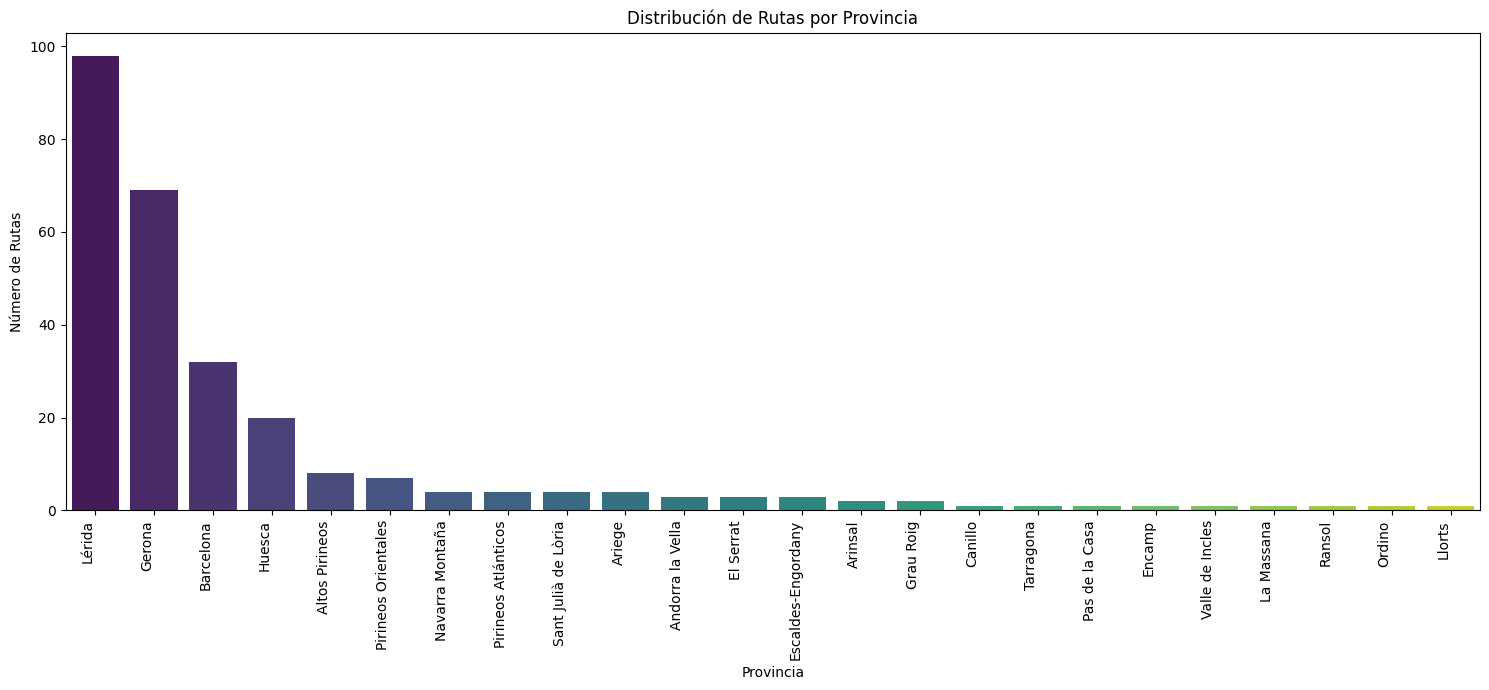

In [8]:
# Plot for 'provincia'
plt.figure(figsize=(15, 7))
sns.countplot(data=rutas_df, x='provincia', palette='viridis', order=rutas_df['provincia'].value_counts().index)
plt.title('Distribución de Rutas por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Rutas')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [9]:
unique_dificultad = rutas_df['dificultad'].unique()
print(unique_dificultad)

['Media' 'Baja' 'Notable' 'Alta (PD+)' 'Alta (F+)' 'Alta (F)' 'Alta (PD)'
 'Alta (AD)' nan 'Alta']


In [10]:
unique_dificultad_desc = rutas_df[['dificultad', 'descripcion_dificultad']].drop_duplicates().reset_index(drop=True)
display(unique_dificultad_desc)

,dificultad,descripcion_dificultad
0,Media,Caminatas de distancia y desnivel moderados qu...
1,Baja,"Paseos cortos, con poco desnivel y sin dificul..."
2,Notable,Excursiones más exigentes o bien porque son má...
3,Alta (PD+),Rutas de alta montaña con trepadas (nociones d...
4,Alta (F+),Rutas de alta montaña con trepadas fáciles y c...
5,Alta (F),Rutas de alta montaña en terreno poco abrupto ...
6,Alta (PD),Rutas de alta montaña con trepadas en terreno ...
7,Alta (AD),Rutas de alta montaña en un terreno bastante v...
8,NaN,NaN
9,Alta,Excursiones exigentes de alta montaña con desn...


In [11]:
# Normalizamos los valores de dificultad en tres grupos alta, media y baja por simplicidad
def map_dificultad(dificultad):
    if pd.isna(dificultad):
        return None

    dificultad = str(dificultad).strip()

    if dificultad == 'Baja':
        return 'baja'
    elif dificultad == 'Media':
        return 'media'
    elif dificultad in ['Alta', 'Alta (AD)', 'Alta (PD)', 'Alta (F)', 'Alta (F+)', 'Alta (PD+)', 'Notable']:
        return 'alta'

    return None  # Para valores inesperados

# Guardar valores originales
rutas_df['dificultad_org'] = rutas_df['dificultad']

# Crear columna nueva normalizada
rutas_df['dificultad'] = rutas_df['dificultad_org'].apply(map_dificultad)

# Mostrar resultado
print(rutas_df[['dificultad_org', 'dificultad']].head())
print("\nValores únicos en 'dificultad':", rutas_df['dificultad'].unique())


  dificultad_org dificultad
0          Media      media
1           Baja       baja
2        Notable       alta
3           Baja       baja
4           Baja       baja

Valores únicos en 'dificultad': ['media' 'baja' 'alta' None]


In [13]:
# Normalización de metadatos textuales
import unicodedata
import re

def clean_text(text):
    if pd.isna(text):
        return text
    text = str(text).lower()  # Convert to string and then lowercase
    # Remove accents
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    # Remove non-alphanumeric characters (keeping spaces)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

columns_to_clean = [
    'pais', 'region', 'provincia', 'comarca', 'zona', 'pueblo',
    'nombre_ruta', 'Punto_salida_llegada', 'poblacion_cercana'
]

for col in columns_to_clean:
    # Guardar la versión original en una nueva columna
    rutas_df[f"{col}_org"] = rutas_df[col]

    # Sobrescribir la columna original con la versión normalizada
    rutas_df[col] = rutas_df[col].apply(clean_text)

print("Columns after cleaning (first 5 rows):")
display(rutas_df[columns_to_clean + [f"{c}_org" for c in columns_to_clean]].head())


Columns after cleaning (first 5 rows):


,pais,region,provincia,comarca,zona,pueblo,nombre_ruta,Punto_salida_llegada,poblacion_cercana,pais_org,region_org,provincia_org,comarca_org,zona_org,pueblo_org,nombre_ruta_org,Punto_salida_llegada_org,poblacion_cercana_org
0,espana,cataluna,barcelona,anoia,montserrat,el bruc,vuelta a las agujas de montserrat desde can ma...,aparcamiento coll can macana,el bruc,espana,cataluna,barcelona,anoia,montserrat,el bruc,vuelta a las agujas de montserrat desde can ma...,aparcamiento coll can macana,el bruc
1,espana,cataluna,lerida,alto urgel,la montana de alinya,figols y alinya,aiguaneix de alinya,puente de ca la rosalia,alinya,espana,cataluna,lerida,alto urgel,la montana de alinya,figols y alinya,aiguaneix de alinya,puente de ca la rosalia,alinya
2,espana,cataluna,lerida,alta ribagorza,valle de boi,boi,estany llong y portarro de espot desde aiguest...,caseta de aiguestortes,boi,espana,cataluna,lerida,alta ribagorza,valle de boi,boi,estany llong y portarro de espot desde aiguest...,caseta de aiguestortes,boi
3,espana,cataluna,gerona,girones,las gavarres girones,madremanya,al pie de las gavarres desde madremanya,entrada madremanya,madremanya,espana,cataluna,gerona,girones,las gavarres girones,madremanya,al pie de las gavarres desde madremanya,entrada madremanya,madremanya
4,espana,cataluna,gerona,alto ampurdan,la llanura ampurdanesa,castellon de ampurias,la reserva integral de les llaunes,el cortalet,castellon de ampurias,espana,cataluna,gerona,alto ampurdan,la llanura ampurdanesa,castellon de ampurias,la reserva integral de les llaunes,el cortalet,castellon de ampurias


In [15]:
# Normalización de la variable categoria -> convertirlo al formato string; para
# posteriormete guardarlo en lista
def normalize_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower().strip()
    # Eliminar acentos
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    # Mantener solo caracteres válidos
    text = re.sub(r'[^a-z0-9\s;/,]', '', text)
    return text

def normalize_categoria(cat):
    if pd.isna(cat):
        return ""

    # 1. Normalizar base
    cat = normalize_text(cat)

    # 2. Separar por ; , /
    items = re.split(r"[;,/]", cat)

    # 3. Limpiar espacios y vacíos
    items = [i.strip() for i in items if i.strip()]

    # 4. Quitar duplicados preservando orden
    seen = set()
    clean = []
    for i in items:
        if i not in seen:
            clean.append(i)
            seen.add(i)

    return ";".join(clean)

In [16]:
rutas_df["categoria_org"] = rutas_df["categoria"]
rutas_df["categoria"] = rutas_df["categoria_org"].apply(normalize_categoria)

In [ ]:
rutas_df.to_csv('rutas_nm.csv', index=False)
print("DataFrame 'rutas_df' exported to 'rutas_nm.csv' successfully.")